In [20]:
!pip install flask-ngrok


In [21]:
!pip install flask-ngrok

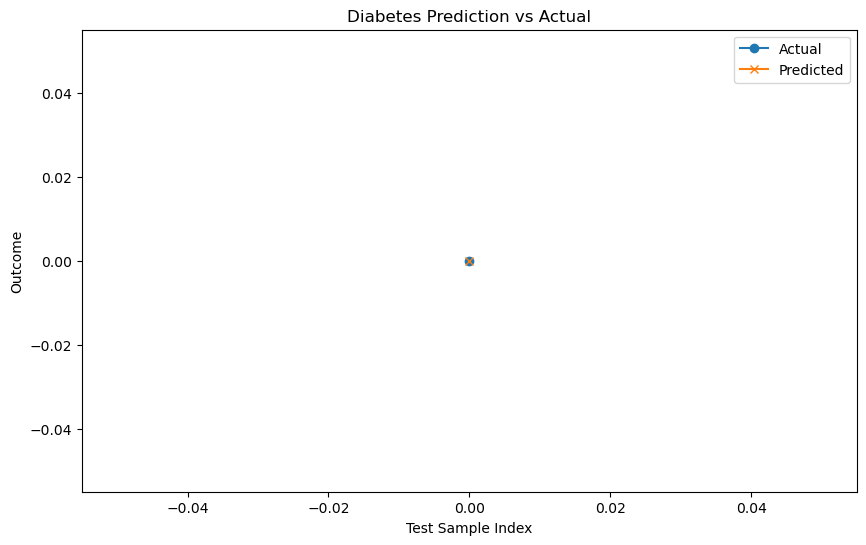

Dataset Head
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  

Prediction vs Actuals:
   Actual  Predicted
0       0          0


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Sample dataset
data = {
    "Pregnancies": [6, 1, 8, 1, 0],
    "Glucose": [148, 85, 183, 89, 137],
    "BloodPressure": [72, 66, 64, 66, 40],
    "SkinThickness": [35, 29, 0, 23, 35],
    "Insulin": [0, 0, 0, 94, 168],
    "BMI": [33.6, 26.6, 23.3, 28.1, 43.1],
    "DiabetesPedigreeFunction": [0.627, 0.351, 0.672, 0.167, 2.288],
    "Age": [50, 31, 32, 21, 33],
    "Outcome": [1, 0, 1, 0, 1]
}

# Create DataFrame
df = pd.DataFrame(data)

# Split into features and target
x = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

# Plot actual vs predicted
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(len(y_test)), y_test.values, label='Actual', marker='o')
ax.plot(range(len(predictions)), predictions, label='Predicted', marker='x')
ax.set_title("Diabetes Prediction vs Actual")
ax.set_xlabel("Test Sample Index")
ax.set_ylabel("Outcome")
ax.legend()
plt.show()

# Display dataset and comparison
print("Dataset Head")
print(df.head())

print("\nPrediction vs Actuals:")
comparison_df = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": predictions
})
print(comparison_df)


In [23]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# ✅ Sample diabetes data
data = {
    "Pregnancies": [6, 1, 8, 1, 0],
    "Glucose": [148, 85, 183, 89, 137],
    "BloodPressure": [72, 66, 64, 66, 40],
    "SkinThickness": [35, 29, 0, 23, 35],
    "Insulin": [0, 0, 0, 94, 168],
    "BMI": [33.6, 26.6, 23.3, 28.1, 43.1],
    "DiabetesPedigreeFunction": [0.627, 0.351, 0.672, 0.167, 2.288],
    "Age": [50, 31, 32, 21, 33],
    "Outcome": [1, 0, 1, 0, 1]  # 1 = Diabetic, 0 = Non-diabetic
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Define features and target
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)

# Predict
y_pred = model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')

print('\nConfusion Matrix:')
print(confusion_matrix(y_test, y_pred))

print('\nClassification Report:')
print(classification_report(y_test, y_pred))


Model Accuracy: 100.00%

Confusion Matrix:
[[1]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



In [24]:
!pip install streamlit
!pip install pyngrok

In [25]:
%%writefile app.py

import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Data - Sample Diabetes Dataset
data = {
    "Pregnancies": [6, 1, 8, 1, 0],
    "Glucose": [148, 85, 183, 89, 137],
    "BloodPressure": [72, 66, 64, 66, 40],
    "SkinThickness": [35, 29, 0, 23, 35],
    "Insulin": [0, 0, 0, 94, 168],
    "BMI": [33.6, 26.6, 23.3, 28.1, 43.1],
    "DiabetesPedigreeFunction": [0.627, 0.351, 0.672, 0.167, 2.288],
    "Age": [50, 31, 32, 21, 33],
    "Outcome": [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

# Prepare the model
X = df.drop("Outcome", axis=1)
y = df["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)

# Streamlit Dashboard
st.title("🩺 Smart Healthcare Diabetes Prediction Dashboard")

# User input form
st.subheader("Enter Patient Details")
pregnancies = st.number_input("Pregnancies", min_value=0, max_value=20, value=0)
glucose = st.number_input("Glucose", min_value=0, max_value=200, value=0)
blood_pressure = st.number_input("Blood Pressure", min_value=0, max_value=200, value=0)
skin_thickness = st.number_input("Skin Thickness", min_value=0, max_value=100, value=0)
insulin = st.number_input("Insulin", min_value=0, max_value=1000, value=0)
bmi = st.number_input("BMI", min_value=0.0, max_value=100.0, value=0.0)
diabetes_pedigree = st.number_input("Diabetes Pedigree Function", min_value=0.0, max_value=2.5, value=0.0)
age = st.number_input("Age", min_value=0, max_value=120, value=0)

if st.button("Predict Diabetes Risk"):
    input_data = pd.DataFrame({
        "Pregnancies": [pregnancies],
        "Glucose": [glucose],
        "BloodPressure": [blood_pressure],
        "SkinThickness": [skin_thickness],
        "Insulin": [insulin],
        "BMI": [bmi],
        "DiabetesPedigreeFunction": [diabetes_pedigree],
        "Age": [age]
    })

    input_data_scaled = scaler.transform(input_data)

    prediction = model.predict(input_data_scaled)

    if prediction[0] == 1:
        st.error("⚠️ The patient is likely to have diabetes.")
    else:
        st.success("✅ The patient is unlikely to have diabetes.")

Overwriting app.py


In [27]:
!pip install pyngrok

from pyngrok import ngrok

# Run the Streamlit app
!streamlit run app.py &>/content/log.txt &

# Authenticate ngrok
!ngrok authtoken "2vw5kS1e2qnAjShCFECe9fNfN0m_24vCcPf1SzRjRch5Zx4nw"

# Create a public URL
url = ngrok.connect(addr="8501")
print(f"Access your app at: {url}")


OSError: Background processes not supported.

In [ ]:
# Dash Dashboard for visualization
!pip install dash
import dash
from dash import dcc, html
import plotly.express as px
import pandas as pd
# Initialize Dash app
app = dash.Dash(__name__)
# Load some example healthcare data for visualization
data = {
    "Pregnancies": [6, 1, 8, 1, 0],
    "Glucose": [148, 85, 183, 89, 137],
    "BloodPressure": [72, 66, 64, 66, 40],
    "SkinThickness": [35, 29, 0, 23, 35],
    "Insulin": [0, 0, 0, 94, 168],
    "BMI": [33.6, 26.6, 23.3, 28.1, 43.1],
    "DiabetesPedigreeFunction": [0.627, 0.351, 0.672, 0.167, 2.288],
    "Age": [50, 31, 32, 21, 33],
    "Outcome": [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)
# Create a simple bar chart visualization
# Changed 'age' to 'Age' and 'target' to 'Outcome'
fig = px.bar(df, x='Age', y='Outcome', title='Patient Health by Age')
# Layout of the dashboard
app.layout = html.Div([
html.H1('Smart Healthcare Analytics Dashboard'),
html.Div('This is an example of healthcare data analytics.'),
dcc.Graph(figure=fig),
# Other components like dropdowns, inputs, etc., can be added here
])
if __name__ == '__main__':
  app.run(debug=True)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 54.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 228.0/228.0 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: Werkzeug
    Found existing installation: Werkzeug 3.1.3
    Uninstalling Werkzeug-3.1.3:
      Successfully uninstalled Werkzeug-3.1.3
  Attempting uninstall: Flask
    Found existing installation: Flask 3.1.0
    Uninstalling Flask-3.1.0:
      Successfully uninstalled Flask-3.1.0


<IPython.core.display.Javascript object>

In [ ]:
!pip install streamlit pyngrok scikit-learn pandas matplotlib plotly --quiet


In [31]:
%%writefile app.py
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Load example healthcare data
data = {
    "Pregnancies": [6, 1, 8, 1, 0],
    "Glucose": [148, 85, 183, 89, 137],
    "BloodPressure": [72, 66, 64, 66, 40],
    "SkinThickness": [35, 29, 0, 23, 35],
    "Insulin": [0, 0, 0, 94, 168],
    "BMI": [33.6, 26.6, 23.3, 28.1, 43.1],
    "DiabetesPedigreeFunction": [0.627, 0.351, 0.672, 0.167, 2.288],
    "Age": [50, 31, 32, 21, 33],
    "Outcome": [1, 0, 1, 0, 1]
}
df = pd.DataFrame(data)

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

model = RandomForestClassifier()
model.fit(X_scaled, y)

# ---------------- UI ----------------
st.set_page_config(page_title="Smart Healthcare Dashboard", layout="centered")
st.title("🩺 Smart Healthcare Prediction & Analytics")

# Input form
st.header("👤 Patient Input")
with st.form("patient_form"):
    pregnancies = st.number_input("Pregnancies", 0, 20, 1)
    glucose = st.number_input("Glucose", 0, 200, 120)
    blood_pressure = st.number_input("Blood Pressure", 0, 150, 70)
    skin_thickness = st.number_input("Skin Thickness", 0, 100, 20)
    insulin = st.number_input("Insulin", 0, 1000, 80)
    bmi = st.number_input("BMI", 0.0, 80.0, 25.0)
    dpf = st.number_input("Diabetes Pedigree Function", 0.0, 3.0, 0.5)
    age = st.number_input("Age", 1, 120, 35)
    submitted = st.form_submit_button("Predict")

if submitted:
    input_data = pd.DataFrame([{
        "Pregnancies": pregnancies,
        "Glucose": glucose,
        "BloodPressure": blood_pressure,
        "SkinThickness": skin_thickness,
        "Insulin": insulin,
        "BMI": bmi,
        "DiabetesPedigreeFunction": dpf,
        "Age": age
    }])
    input_scaled = scaler.transform(input_data)
    prediction = model.predict(input_scaled)[0]

    if prediction == 1:
        st.error("⚠️ Likely to have diabetes")
    else:
        st.success("✅ Unlikely to have diabetes")

# ---------------- Charts ----------------
st.header("📊 Data Visualizations")

# 1. Outcome distribution
st.subheader("🧪 Outcome Distribution")
fig1 = px.histogram(df, x="Outcome", color="Outcome", nbins=2, title="Diabetes vs Non-Diabetes")
st.plotly_chart(fig1)

# 2. Age vs Outcome
st.subheader("👵 Age vs Outcome")
fig2 = px.bar(df, x="Age", y="Outcome", color="Outcome", title="Outcome by Age")
st.plotly_chart(fig2)

# 3. Glucose Level Histogram
st.subheader("🍬 Glucose Level Distribution")
fig3, ax3 = plt.subplots()
ax3.hist(df['Glucose'], bins=5, color='orange', edgecolor='black')
ax3.set_title("Glucose Distribution")
ax3.set_xlabel("Glucose Level")
ax3.set_ylabel("Count")
st.pyplot(fig3)

# 4. Show raw data
with st.expander("📋 Show Raw Data"):
    st.dataframe(df)


Overwriting app.py


In [32]:
from pyngrok import ngrok
import subprocess
import time

!pkill streamlit

# Start the Streamlit app
subprocess.Popen(["streamlit", "run", "app.py"])

# Wait a moment and expose the app
time.sleep(5)
public_url = ngrok.connect(addr = "8501")
print("🚀 App is live at:", public_url)


'pkill' is not recognized as an internal or external command,
operable program or batch file.


PyngrokNgrokInstallError: An error occurred while downloading ngrok from https://bin.equinox.io/c/bNyj1mQVY4c/ngrok-v3-stable-windows-amd64.zip: [Errno 22] Invalid argument: 'C:\\Users\\makth\\AppData\\Local\\Temp\\ngrok-v3-stable-windows-amd64.zip'